<a href="https://colab.research.google.com/github/manojsuggala/Image-Classification./blob/main/image_class_minor_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image Classification using Machine Learning


In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

In [8]:
target = []                 #list for output(1-D) data(dependent variable)
images = []                 #list for input(2-D) data
flat_data = []              #list for flattened input data(1-D)(independent variable)

DATADIR = '/content/drive/MyDrive/ds python/Images'
CATEGORIES = ['apple','banana','mango']

for i in CATEGORIES:
  class_num = CATEGORIES.index(i)               #label encoding
  path = os.path.join(DATADIR,i)                #creating a path to use all the images
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))  #normalizing each and every image iteratively to a number between 0 and 1
    flat_data.append(img_resized.flatten())     #flattening the data and storing in the list
    images.append(img_resized)
    target.append(class_num)
    #plt.imshow(img_resized)
    #plt.show()                                 #Use just in case to show the resized images
flat_data = np.array(flat_data)
images = np.array(images)                         #transforming all the data into a 1-D array
target = np.array(target)

In [9]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
unique,count = np.unique(target,return_counts=True)

<BarContainer object of 3 artists>

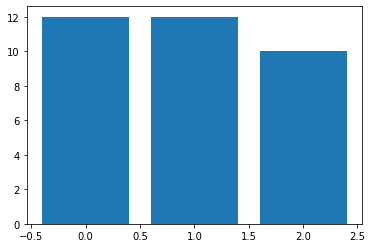

In [11]:
plt.bar(unique,count)

In [13]:
#Splitting the data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.25,random_state=0)

In [14]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

array([0, 1, 2, 1, 0, 2, 2, 1, 0])

In [15]:
y_test

array([0, 1, 2, 1, 0, 2, 2, 1, 0])

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = {'C':[0.1,1,10,100],
               'kernel':['linear','rbf']}              
grid  = GridSearchCV(SVC(probability=True),param_grid)
grid.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [17]:
y_pred = grid.predict(x_test)
y_pred

array([0, 2, 2, 1, 0, 2, 2, 1, 0])

In [18]:
y_test

array([0, 1, 2, 1, 0, 2, 2, 1, 0])

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [20]:
accuracy_score(y_pred,y_test)

0.8888888888888888

In [21]:
confusion_matrix(y_pred,y_test)

array([[3, 0, 0],
       [0, 2, 0],
       [0, 1, 3]])

In [22]:
#saving the model using pickle
import pickle
pickle.dump(grid,open('img_model.p','wb'))

In [23]:
model = pickle.load(open('img_model.p','rb'))

Enter the url of image:https://upload.wikimedia.org/wikipedia/commons/4/40/Mango_4.jpg
(662, 800, 3)
Predicted output:mango


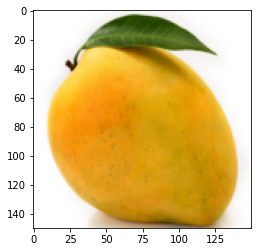

In [24]:
#Testing random image
flat_data = []
url = input('Enter the url of image:')
img = imread(url)
img_resized = resize(img,(150,150,3)) 
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'Predicted output:{y_out}')
# Testing the model by taking sample Images url.

In [27]:
#Deployment 
!pip install streamlit --quiet
!pip install pyngrok==4.1.1 --quiet
from pyngrok import ngrok